In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow import keras

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Methods for loading/details of dataset

In [6]:
def load_data(name):
    path='/Users/tejaswiyd/Downloads/Team_Project/'+name
    return pd.read_csv(path)

In [7]:
def details(df):
    print('Column Types')
    print(df.dtypes)
    print('------------------')
    print('Missing Values')
    print(df.isna().sum())
    print('------------------')
    print('Description')
    print(df.describe().applymap('{:,.2f}'.format))



# Load clean data

In [8]:
df=load_data('selectedHVAC.csv')
df=df.drop(['average_energy','sum_energy'], axis=1)
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tejaswiyd/Downloads/Team_Project/selectedHVAC.csv'

In [9]:
ele=load_data('ele.csv')
ele= ele.drop('Unnamed: 6', axis=1)
ele.fillna(method='ffill', inplace=True)
ele['date'] = pd.to_datetime(ele.date)
ele['date'] = ele['date'].dt.strftime("%y/%m/%d, %H:%M")


ele['sum_energy']=ele[['mels_S','lig_S','mels_N', 'hvac_N', 'hvac_S']].sum(axis=1)
ele['average_energy']=ele[['mels_S','lig_S','mels_N', 'hvac_N', 'hvac_S']].mean(axis=1)
ele

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S,sum_energy,average_energy
0,"18/01/01, 01:00",1.200000,0.200000,7.500000,37.400002,19.500000,65.800002,13.160000
1,"18/01/01, 01:15",1.300000,0.200000,6.800000,37.500000,19.889999,65.690000,13.138000
2,"18/01/01, 01:30",1.100000,0.200000,7.400000,38.000000,19.299999,65.999999,13.200000
3,"18/01/01, 01:45",1.200000,0.200000,7.700000,37.200001,18.889999,65.190000,13.038000
4,"18/01/01, 02:00",1.100000,0.200000,7.300000,37.400002,24.700001,70.700003,14.140001
...,...,...,...,...,...,...,...,...
103043,"20/12/31, 23:00",0.071429,0.100000,1.177354,7.600000,27.652381,36.601163,7.320233
103044,"20/12/31, 23:15",0.078571,0.100000,1.140462,7.461538,27.735000,36.515572,7.303114
103045,"20/12/31, 23:30",0.093333,0.557143,1.792833,7.526000,27.022222,36.991532,7.398306
103046,"20/12/31, 23:45",0.092308,0.680000,1.930493,7.851538,27.833333,38.387672,7.677534


In [10]:
final_df =  pd.merge(df, ele,  on="date")
final_df

NameError: name 'df' is not defined

In [ ]:
TEST_SIZE= 0.1
VALIDATION_SIZE= 0.2

df['month']=pd.DatetimeIndex(df['date']).month

In [ ]:
#df.dropna(inplace=True)
temp=final_df
features=temp.drop(['sum_energy','average_energy','date'], axis=1)
target=final_df['sum_energy']



from sklearn.decomposition import PCA

# Create the PCA model
pca_10 = PCA(n_components=10,random_state=42)
# Reduce the features to 3 dimensions
x_reduced = pca_10.fit_transform(features)





X = np.array( x_reduced )
y = np.array( target )
y = y.reshape(len(y), 1)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


Shape of X: (74966, 10)
Shape of y: (74966, 1)


In [ ]:
scaler1 = StandardScaler()
X = scaler1.fit_transform( X, y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=VALIDATION_SIZE)


print("#####  Shape of X_train", X_train.shape)
print("#####  Shape of X_validate", X_validate.shape)
print("#####  Shape of X_test", X_test.shape)
print("#######  Shape of y_train", y_train.shape)
print("#######  Shape of y_validate", y_validate.shape)
print("#######  Shape of y_test", y_test.shape)

#####  Shape of X_train (53975, 10)
#####  Shape of X_validate (13494, 10)
#####  Shape of X_test (7497, 10)
#######  Shape of y_train (53975, 1)
#######  Shape of y_validate (13494, 1)
#######  Shape of y_test (7497, 1)


In [ ]:
inputColumns = X_train.shape[1]
HIDDEN_LAYER_SIZE = 40
NUM_EPOCHS=200
BATCH_SIZE= 300
model = Sequential(
    [
        keras.layers.Dense(units=1, input_shape=[inputColumns]),
        keras.layers.Dense(HIDDEN_LAYER_SIZE, activation='relu'),
        keras.layers.Dense(HIDDEN_LAYER_SIZE, activation='relu'),
        keras.layers.Dense(HIDDEN_LAYER_SIZE, activation='relu'),
        keras.layers.Dense(1)

    ]
)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:
results= model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size= BATCH_SIZE, validation_data=(X_validate, y_validate), verbose =2 )

Epoch 1/200
180/180 - 2s - loss: 3846.7383 - val_loss: 1945.5707 - 2s/epoch - 11ms/step
Epoch 2/200
180/180 - 1s - loss: 1856.8486 - val_loss: 1811.7523 - 546ms/epoch - 3ms/step
Epoch 3/200
180/180 - 0s - loss: 1726.4141 - val_loss: 1602.4286 - 484ms/epoch - 3ms/step
Epoch 4/200
180/180 - 0s - loss: 1507.4240 - val_loss: 1352.7897 - 430ms/epoch - 2ms/step
Epoch 5/200
180/180 - 0s - loss: 1212.4877 - val_loss: 985.9751 - 472ms/epoch - 3ms/step
Epoch 6/200
180/180 - 0s - loss: 850.9310 - val_loss: 719.9267 - 467ms/epoch - 3ms/step
Epoch 7/200
180/180 - 1s - loss: 651.9733 - val_loss: 631.1193 - 548ms/epoch - 3ms/step
Epoch 8/200
180/180 - 1s - loss: 597.9460 - val_loss: 575.4533 - 734ms/epoch - 4ms/step
Epoch 9/200
180/180 - 1s - loss: 539.8903 - val_loss: 559.9821 - 792ms/epoch - 4ms/step
Epoch 10/200
180/180 - 1s - loss: 509.8712 - val_loss: 538.5231 - 756ms/epoch - 4ms/step
Epoch 11/200
180/180 - 1s - loss: 484.0127 - val_loss: 490.6417 - 780ms/epoch - 4ms/step
Epoch 12/200
180/180 - 

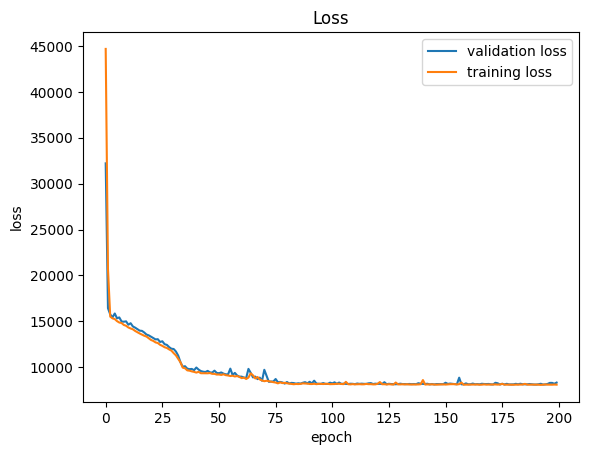

In [ ]:
plt.title("Loss")
plt.plot(results.history['val_loss'])
plt.plot(results.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error

test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

y_preds= model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)

mae_array = mae.numpy()
mse_array = mse.numpy()


print(f'Avarage MSE: '+ str(np.mean(mse_array)))
print(f'Average MAE: '+str(np.mean(mae_array)))


235/235 [==============================] - 0s 2ms/step - loss: 8387.4648
Test loss: 8387.46484375
235/235 [==============================] - 0s 2ms/step
Avarage MSE: 8387.46
Average MAE: 68.053085


In [ ]:

for i in range (500,550):
  print('pred: '+ str(y_preds[i])+ '   test: '+ str(y_test[i]) + '   MAE: '+ str(mae_array[i]))

pred: [382.31674]   test: [157.07750437]   MAE: 225.23924
pred: [353.70346]   test: [381.42840225]   MAE: 27.724945
pred: [185.84866]   test: [231.90171088]   MAE: 46.053055
pred: [229.85591]   test: [235.15567414]   MAE: 5.299759
pred: [225.79723]   test: [191.47322156]   MAE: 34.324005
pred: [554.9289]   test: [689.1037587]   MAE: 134.17487
pred: [272.11737]   test: [69.3436868]   MAE: 202.77368
pred: [233.53937]   test: [221.08559645]   MAE: 12.453766
pred: [211.92049]   test: [161.1246143]   MAE: 50.795868
pred: [489.44653]   test: [584.94170492]   MAE: 95.49518
pred: [471.00534]   test: [402.75778426]   MAE: 68.24756
pred: [201.98796]   test: [236.09031736]   MAE: 34.102356
pred: [570.02057]   test: [364.25289059]   MAE: 205.76767
pred: [427.18985]   test: [442.12804671]   MAE: 14.938202
pred: [238.75797]   test: [139.26929544]   MAE: 99.48866
pred: [468.10843]   test: [407.20866368]   MAE: 60.89978
pred: [371.62546]   test: [768.60594751]   MAE: 396.9805
pred: [218.21762]   test:

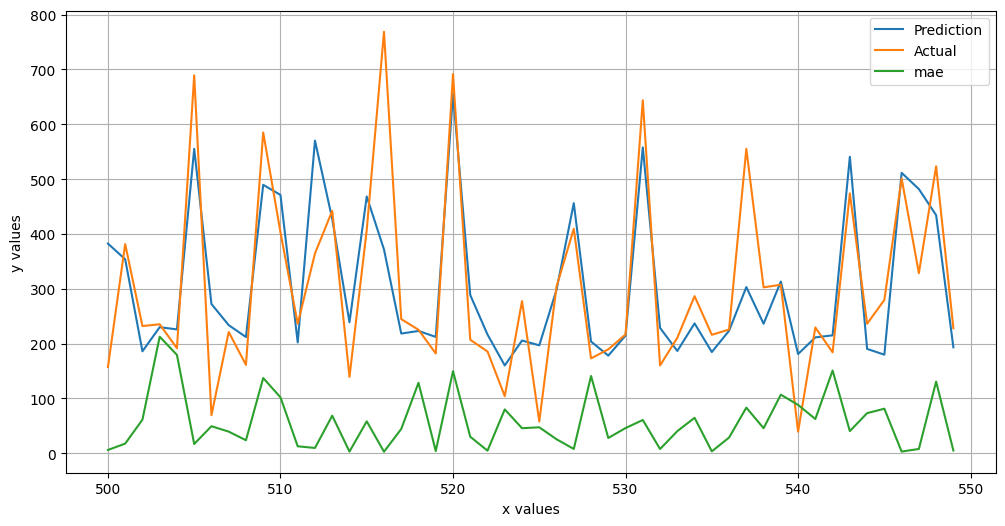

In [ ]:
import matplotlib.pyplot as plt
x=np.arange(len(y_preds))
plt.figure(figsize=(12, 6))
plt.plot(x[500:550], y_preds[500:550], label='Prediction')
plt.plot(x[500:550], y_test[500:550], label='Actual')
plt.plot(x[500:550], mae[:50], label='mae')

# add x-axis label
plt.xlabel('x values')

# add y-axis label
plt.ylabel('y values')

# add legend
plt.legend()

#display the plot
plt.grid()
plt.show()

In [ ]:
df

,date,average_energy,sum_energy,rtu_001_sa_temp,rtu_002_sa_temp,rtu_003_sa_temp,rtu_004_sa_temp,rtu_001_ra_temp,rtu_002_ra_temp,rtu_003_ra_temp,...,zone_064_fan_spd,zone_065_fan_spd,zone_066_fan_spd,zone_067_fan_spd,zone_068_fan_spd,zone_069_fan_spd,zone_070_fan_spd,zone_071_fan_spd,zone_072_fan_spd,month
0,"18/01/01, 01:00",53.138777,388.584499,67.2,68.3,64.9,65.9,68.6,68.8,67.8,...,20.0,25.0,35.0,20.0,70.0,20.0,20.0,20.0,40.0,1
1,"18/01/01, 01:15",53.049941,387.934878,66.9,68.0,64.9,65.6,68.4,68.7,67.8,...,20.0,25.0,35.0,20.0,70.0,20.0,20.0,20.0,40.0,1
2,"18/01/01, 01:30",53.300291,389.765594,67.9,68.7,65.0,65.4,68.4,68.8,67.8,...,20.0,25.0,35.0,20.0,70.0,20.0,20.0,20.0,40.0,1
3,"18/01/01, 01:45",52.646152,384.982111,67.9,68.2,65.3,65.4,68.4,68.7,67.8,...,20.0,25.0,35.0,20.0,70.0,20.0,20.0,20.0,40.0,1
4,"18/01/01, 02:00",57.095920,417.521647,67.9,68.0,64.9,65.4,68.3,68.6,67.9,...,20.0,25.0,35.0,20.0,70.0,20.0,20.0,20.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74961,"20/12/31, 23:00",29.558374,216.149609,67.2,67.9,67.4,64.1,68.8,67.0,66.0,...,20.0,25.0,35.0,20.0,20.0,20.0,20.0,20.0,40.0,12
74962,"20/12/31, 23:15",29.489252,215.644146,67.3,67.9,67.6,64.3,69.0,66.9,66.2,...,20.0,25.0,35.0,20.0,20.0,20.0,20.0,20.0,40.0,12
74963,"20/12/31, 23:30",29.873628,218.454948,67.0,67.5,67.1,64.0,69.0,67.0,66.4,...,20.0,25.0,35.0,20.0,20.0,20.0,20.0,20.0,40.0,12
74964,"20/12/31, 23:45",31.001123,226.699911,67.4,67.8,67.6,64.3,69.2,67.1,66.5,...,20.0,25.0,35.0,20.0,20.0,20.0,20.0,20.0,40.0,12


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
filtered_rows = df[df['average_energy'] < 3]
print(filtered_rows)



                  date  average_energy  sum_energy  rtu_001_sa_temp  \
40105  20/02/22, 02:30        2.003690   14.652255             68.7   
40106  20/02/22, 02:45        0.903763    6.608892             68.8   

       rtu_002_sa_temp  rtu_003_sa_temp  rtu_004_sa_temp  rtu_001_ra_temp  \
40105             69.6             70.1             68.7             69.9   
40106             69.8             70.1             68.6             69.8   

       rtu_002_ra_temp  rtu_003_ra_temp  ...  zone_064_fan_spd  \
40105             69.6             71.5  ...               0.0   
40106             69.6             71.1  ...               0.0   

       zone_065_fan_spd  zone_066_fan_spd  zone_067_fan_spd  zone_068_fan_spd  \
40105               0.0              35.0               0.0               0.0   
40106               0.0              35.0               0.0               0.0   

       zone_069_fan_spd  zone_070_fan_spd  zone_071_fan_spd  zone_072_fan_spd  \
40105               0.0       



*   standardize the data before pca
*   fix average and sum energy usage data


